In [ ]:
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rarfile
import pandas as pd
from textblob import TextBlob
from tqdm import tqdm


In [ ]:
rar_file_path = 'sample_data/african_climate_change_data.rar'  # Specify the path to your RAR file
extract_path = 'sample_data'  # Specify the path to extract the files from the RAR

with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(extract_path)

In [ ]:
df = pd.read_csv('sample_data/african_climate_change_data.csv')
df.head()

,created_utc,body
0,2017-05-15 23:56:50,i'll start off by saying that i agree that cli...
1,2017-05-15 21:57:39,lots of possible reasons...\n\n1. we out-compe...
2,2017-05-15 21:38:27,"well 150 years ago, currencies were valued qui..."
3,2017-05-15 21:19:36,you say that even as the evidence to the contr...
4,2017-05-15 21:15:07,"&gt; savages, non-civilized peoples so africa,..."


In [ ]:
cleaned_posts = [post.replace("\n", "") for post in df['body'].to_list()]
print(len(cleaned_posts))
cleaned_posts[0]

72854


"i'll start off by saying that i agree that climate change is real, affected by man and a massive concern. the argument i'll make is for why some people don't think it's an issue.basically we're still in the ice age, as we still have ice sheets in the northern and southern hemispheres. compared to other points in the planet's history both the temperature and sea levels are abnormally low, and the data show that they are both bound to rise. then what people do is take this fact and use it to say 'well hey, it's going to happen anyway! can't be our fault for flooding the atmosphere with co2, right?' ignoring the fact that they shouldn't rise anywhere near as quickly as they are, and that they will massively impact human lives. this won't change your view, but that's because this is a view is held by idiots.something that might ease your worries, though, is that it isn't the apocalypse many of us fear. yes we'll lose great swathes of land, but i think mankind is plenty well enough equippe

In [ ]:
# List of predefined entities
target = [
    # Countries in Africa
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Central African Republic',
    'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Djibouti', 'Egypt',
    'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
    'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles',
    'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
    'Zambia', 'Zimbabwe', 'africa',

    # Regional organizations
    'African Union', 'African Development Bank', 'Economic Community of West African States', 'Southern African Development Community',
    'East African Community', 'Intergovernmental Authority on Development', 'Nile Basin Initiative',

    # Climate change-related terms and concepts
    'Greenhouse gases', 'Global warming', 'Carbon emissions', 'Adaptation', 'Mitigation', 'Climate resilience',
    'Extreme weather events', 'Droughts', 'Desertification', 'Deforestation', 'Renewable energy', 'Sustainable development',
    'Paris Agreement', 'COP'
]


In [ ]:
target_entities = [t.lower() for t in target]
target_entities[:10]

['algeria',
 'angola',
 'benin',
 'botswana',
 'burkina faso',
 'burundi',
 'cape verde',
 'central african republic',
 'chad',
 'comoros']

In [ ]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        sentiment = 'Positive'
    elif sentiment_score < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-06-22 23:47:07.271854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 23:47:08.612950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# n = 5000

In [ ]:


# Extract unique entities from the list of posts
unique_entities = set()
with tqdm(total=len(cleaned_posts), desc="Extracting Entities...") as pbar:
  for post in cleaned_posts:
      doc = nlp(post)
      for entity in doc.ents:
          if entity.text in target_entities:
              unique_entities.add(entity.text)
      pbar.update(1)

Extracting Entities...: 100%|██████████| 5000/5000 [05:46<00:00, 14.42it/s]


In [ ]:
# Filter posts based on the entities in target_entities
filtered_posts = []
with tqdm(total=len(cleaned_posts), desc="Filtering posts...") as pbar:
  for post in cleaned_posts:
      doc = nlp(post)
      for entity in doc.ents:
          if entity.text in unique_entities:
              filtered_posts.append((post, entity.text))
      pbar.update(1)

Filtering posts...: 100%|██████████| 5000/5000 [05:20<00:00, 15.62it/s]


In [ ]:
# Perform sentiment analysis on filtered posts
sentiments = []
with tqdm(total=len(cleaned_posts), desc="Performing Sentiment analysis...") as pbar:
  for post, entity in filtered_posts:
      sentiment = analyze_sentiment(post)
      sentiments.append({'Text': post, 'Entity': entity, 'Sentiment': sentiment})
      pbar.update(1)

# Create a DataFrame of entities and sentiments
df = pd.DataFrame(sentiments)

Performing Sentiment analysis...: 6295it [00:18, 348.07it/s]


In [ ]:
df

,Text,Entity,Sentiment
0,i'll start off by saying that i agree that cli...,africa,Positive
1,lots of possible reasons...1. we out-competed ...,africa,Positive
2,lots of possible reasons...1. we out-competed ...,africa,Positive
3,lots of possible reasons...1. we out-competed ...,africa,Positive
4,"well 150 years ago, currencies were valued qui...",africa,Positive
...,...,...,...
6290,&gt; continuing to grow developing economiesth...,rwanda,Positive
6291,what do you mean by uninhabitable? people curr...,africa,Positive
6292,"this post has the trappings of legitimacy, but...",africa,Positive
6293,https://www.naturalnews.com/2017-01-14-mathema...,africa,Positive


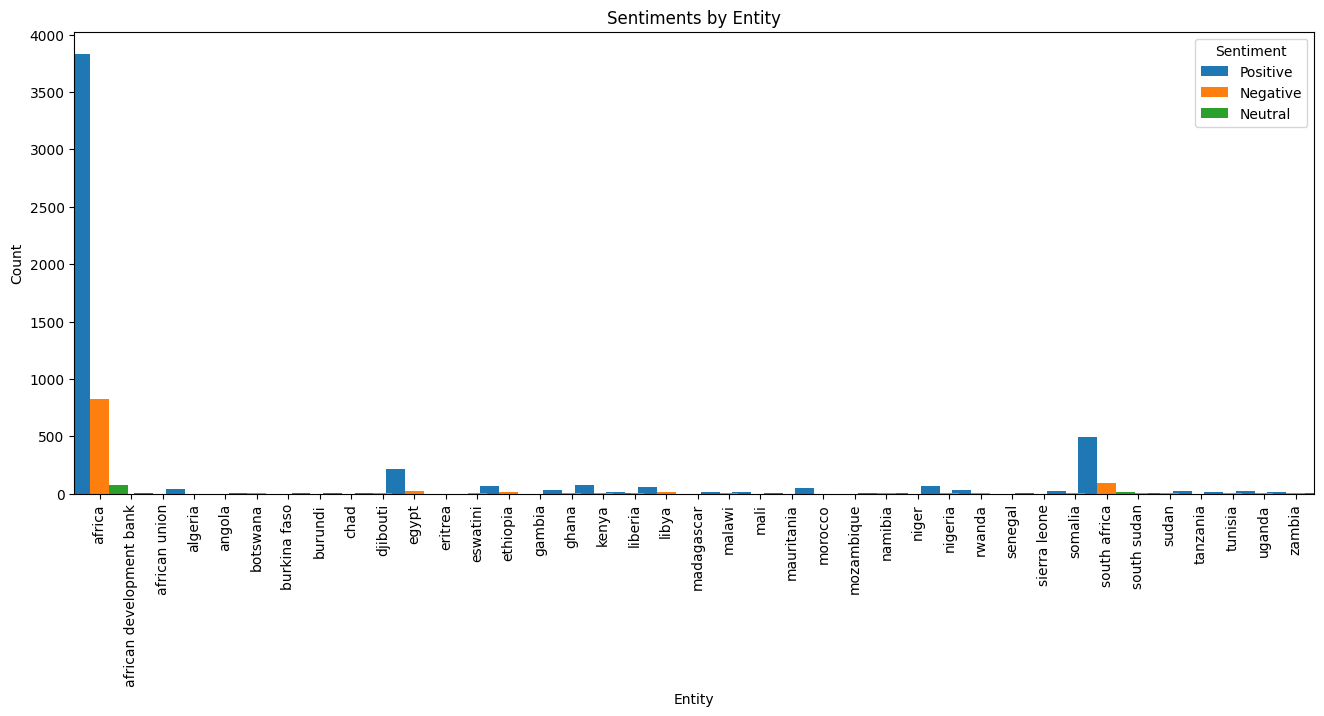

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Group the DataFrame by 'Entity' and 'Sentiment' and calculate the count
grouped_df = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Define the width of each bar
bar_width = 0.6

# Set the figure size
plt.figure(figsize=(16, 6))

# Generate the x-axis positions for each bar group
x = np.arange(len(grouped_df.index))

# Plot the bars for each sentiment category
plt.bar(x, grouped_df['Positive'], width=bar_width, label='Positive')
plt.bar(x + bar_width, grouped_df['Negative'], width=bar_width, label='Negative')
plt.bar(x + 2 * bar_width, grouped_df['Neutral'], width=bar_width, label='Neutral')

# Set the x-axis ticks and labels
bar_groups = len(grouped_df.index)
plt.xticks(x + bar_width, grouped_df.index, rotation=90)

# Set the spacing between bar groups
bar_group_spacing = 0.2
plt.xlim(-bar_group_spacing, bar_groups - 1 + bar_group_spacing)

# Set labels and title
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Sentiments by Entity')

# Show the legend
plt.legend(title='Sentiment')

# Display the plot
plt.show()


In [ ]:
grouped = df.groupby('Entity')

# Iterate over the groups and create separate dataframes
dataframes = []
for group_name, group_data in grouped:
    # Create a new dataframe for each group
    group_dataframe = pd.DataFrame(group_data)
    dataframes.append(group_dataframe)

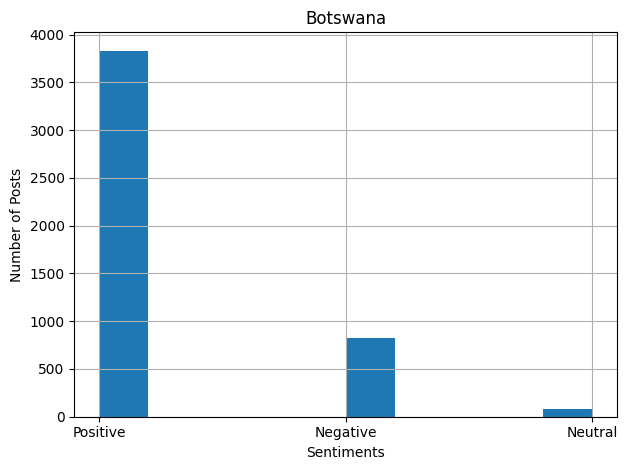

In [ ]:
dataframes[0]['Sentiment'].hist()
plt.title(dataframes[5]['Entity'].to_list()[0].title())
plt.xlabel('Sentiments')
plt.ylabel('Number of Posts')
plt.tight_layout()

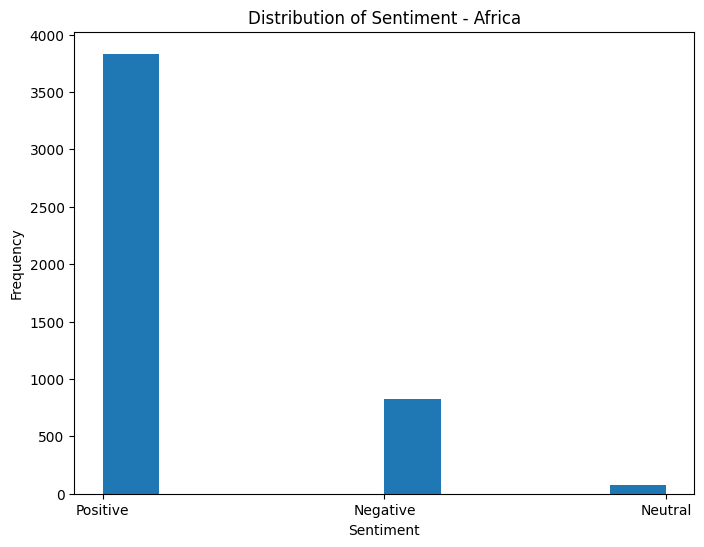

Positive    3833
Negative     822
Neutral       76
Name: Sentiment, dtype: int64



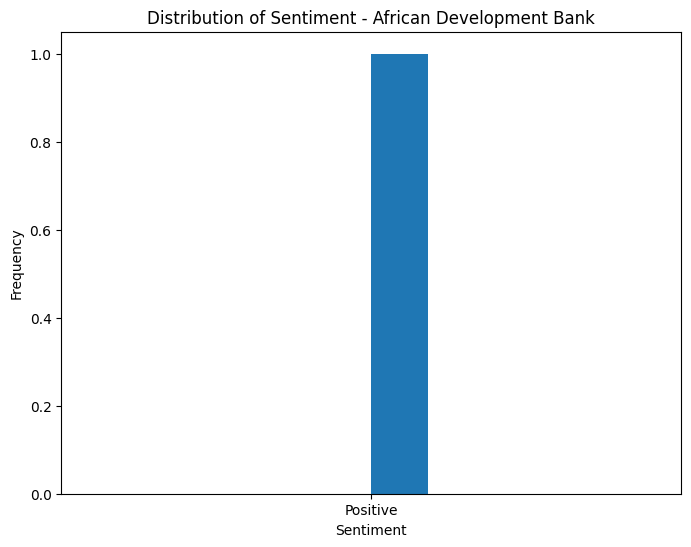

Positive    1
Name: Sentiment, dtype: int64



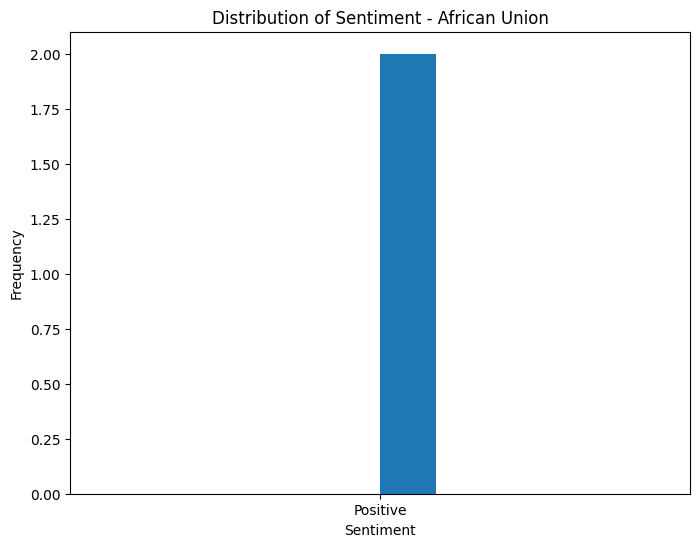

Positive    2
Name: Sentiment, dtype: int64



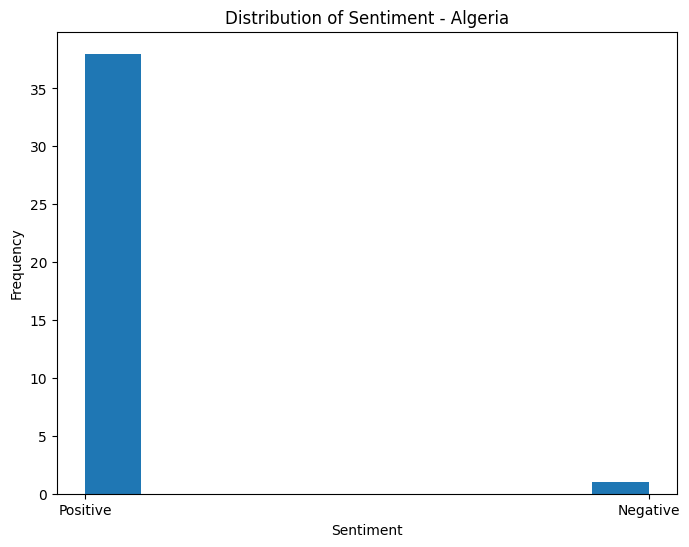

Positive    38
Negative     1
Name: Sentiment, dtype: int64



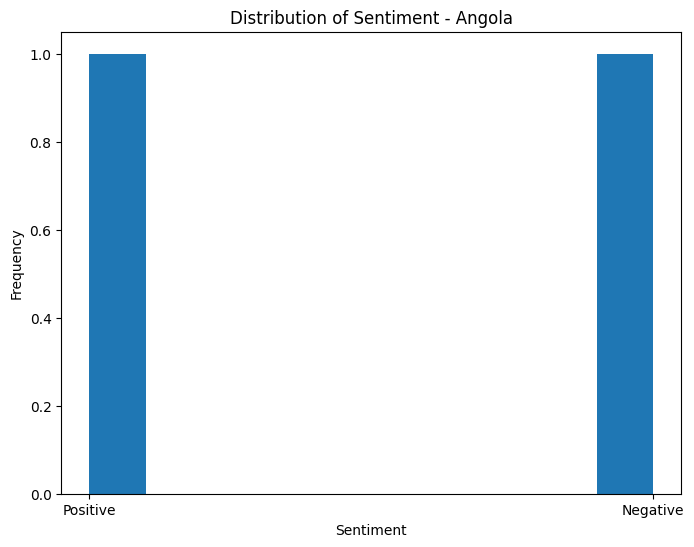

Positive    1
Negative    1
Name: Sentiment, dtype: int64



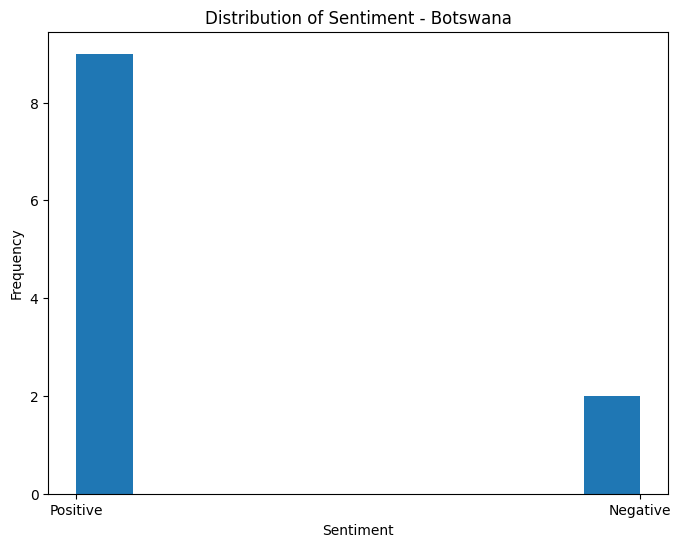

Positive    9
Negative    2
Name: Sentiment, dtype: int64



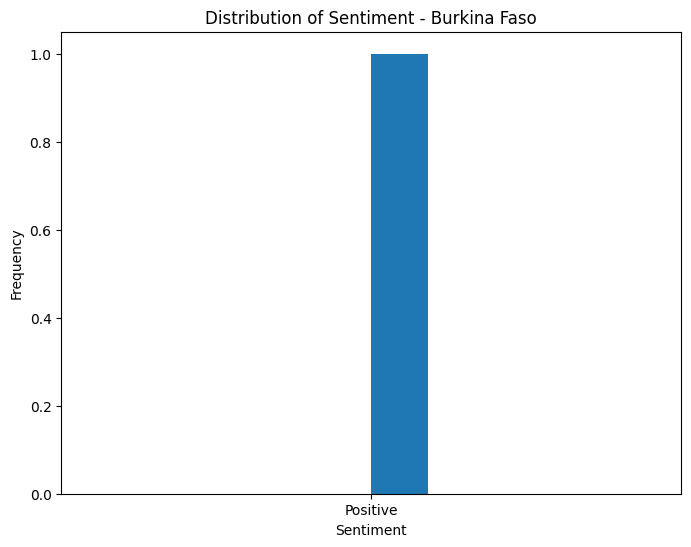

Positive    1
Name: Sentiment, dtype: int64



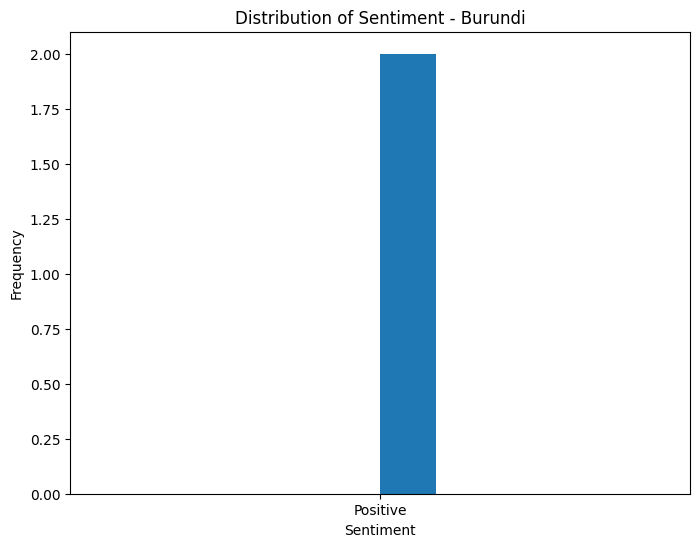

Positive    2
Name: Sentiment, dtype: int64



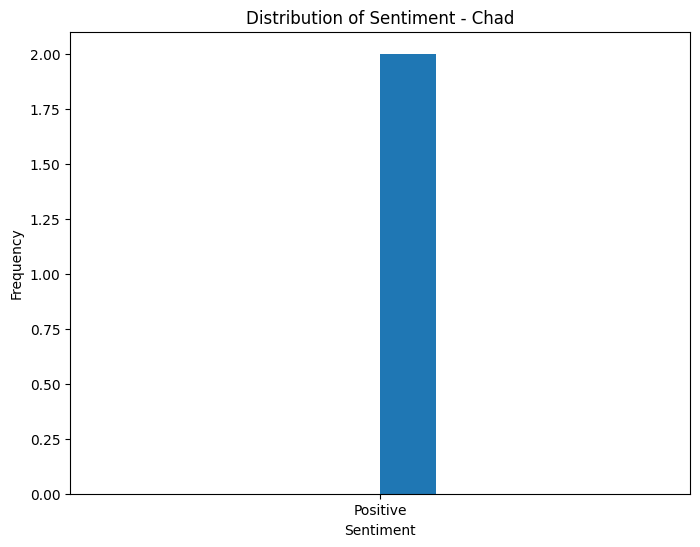

Positive    2
Name: Sentiment, dtype: int64



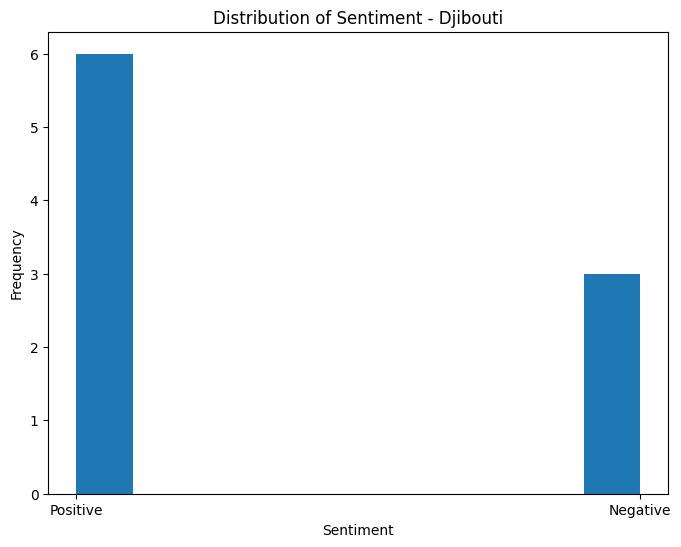

Positive    6
Negative    3
Name: Sentiment, dtype: int64



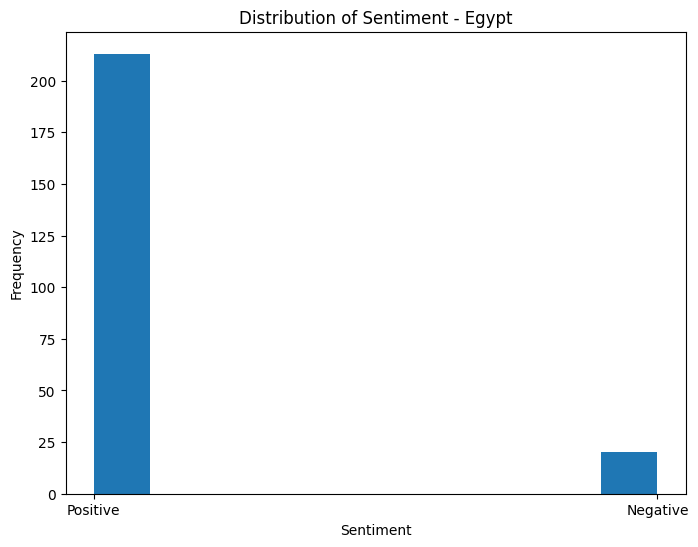

Positive    213
Negative     20
Name: Sentiment, dtype: int64



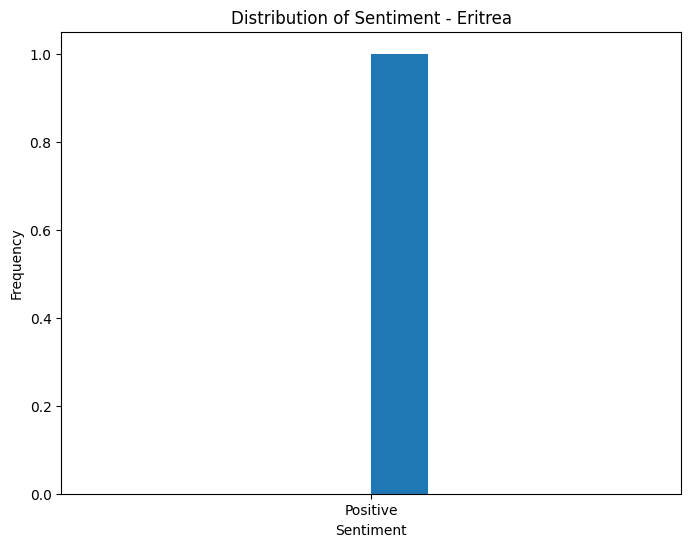

Positive    1
Name: Sentiment, dtype: int64



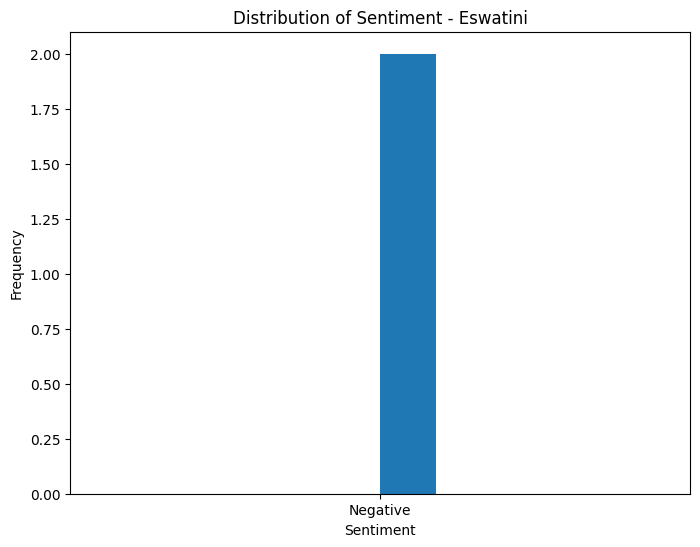

Negative    2
Name: Sentiment, dtype: int64



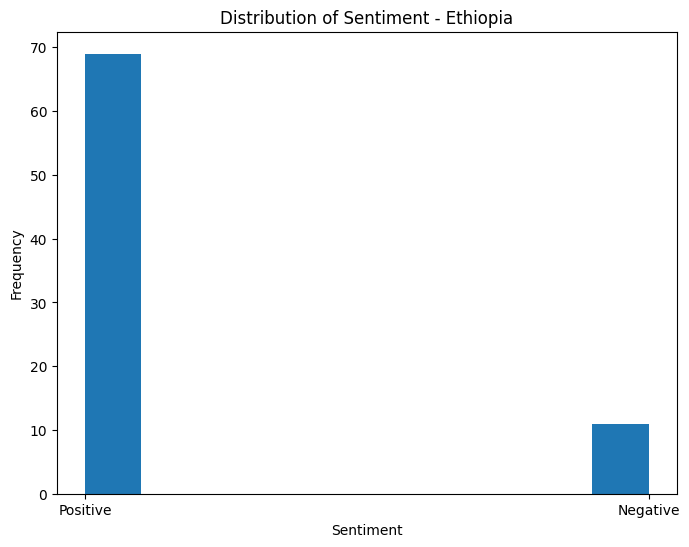

Positive    69
Negative    11
Name: Sentiment, dtype: int64



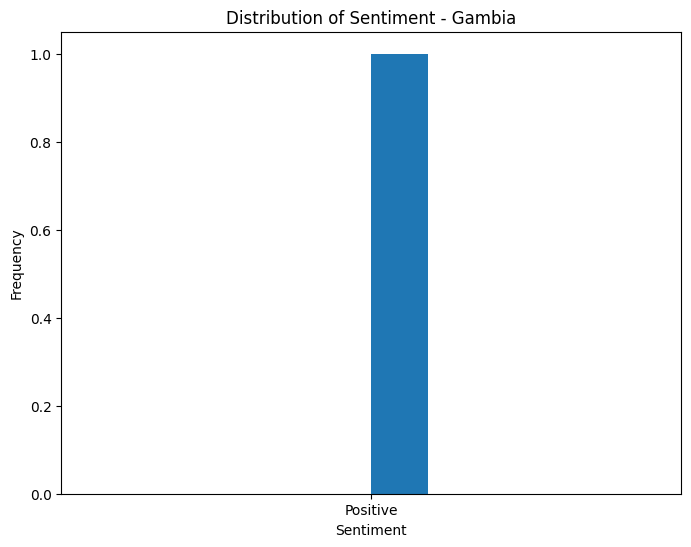

Positive    1
Name: Sentiment, dtype: int64



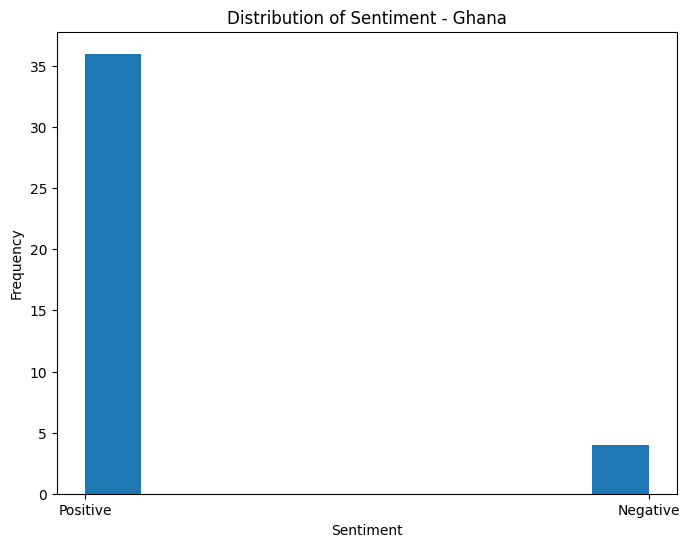

Positive    36
Negative     4
Name: Sentiment, dtype: int64



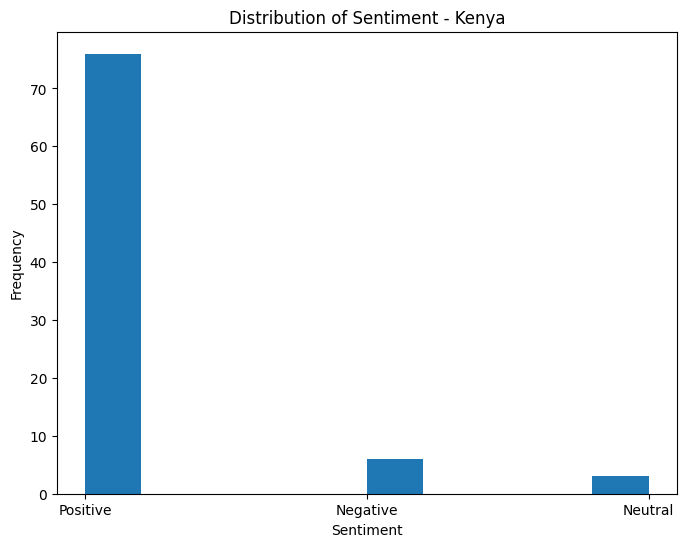

Positive    76
Negative     6
Neutral      3
Name: Sentiment, dtype: int64



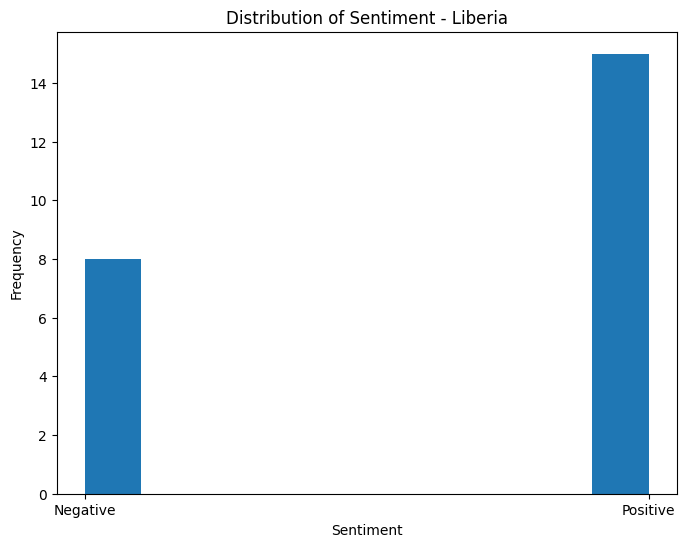

Positive    15
Negative     8
Name: Sentiment, dtype: int64



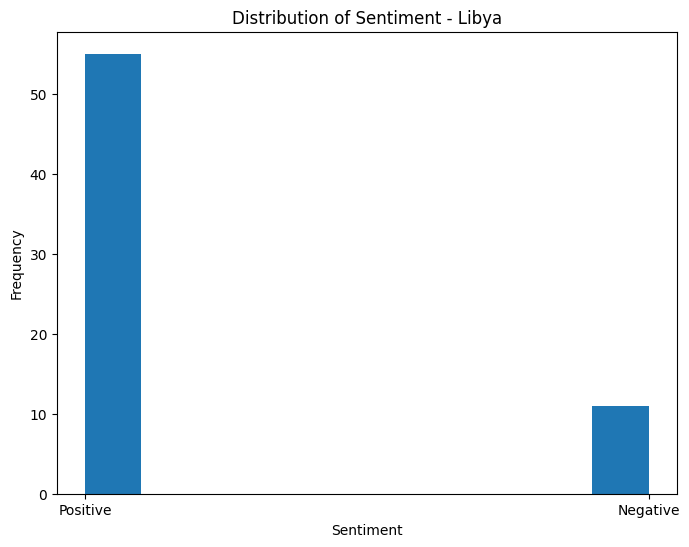

Positive    55
Negative    11
Name: Sentiment, dtype: int64



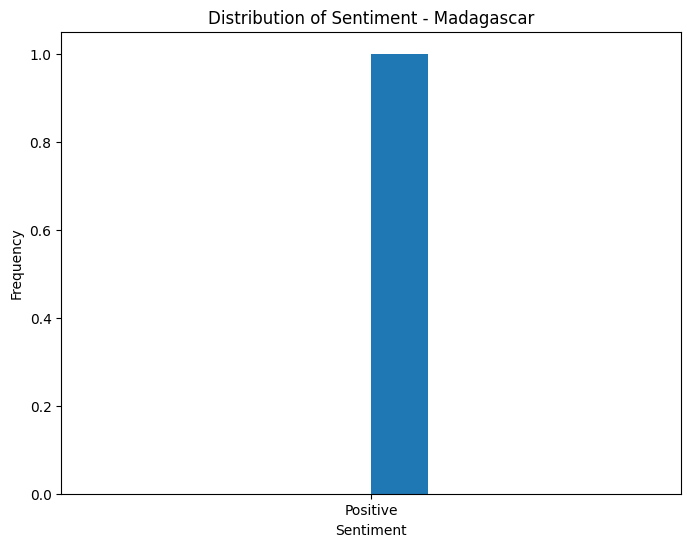

Positive    1
Name: Sentiment, dtype: int64



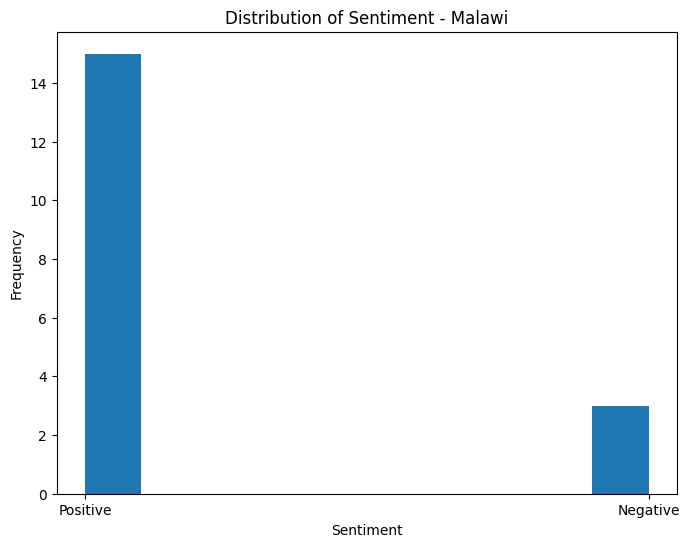

Positive    15
Negative     3
Name: Sentiment, dtype: int64



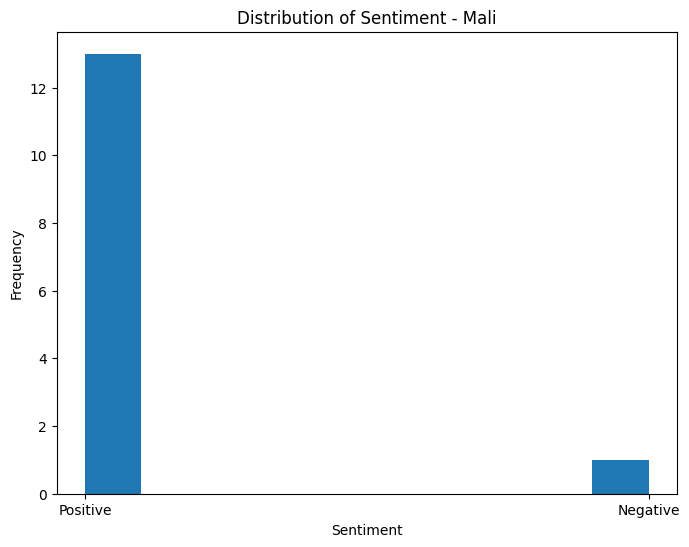

Positive    13
Negative     1
Name: Sentiment, dtype: int64



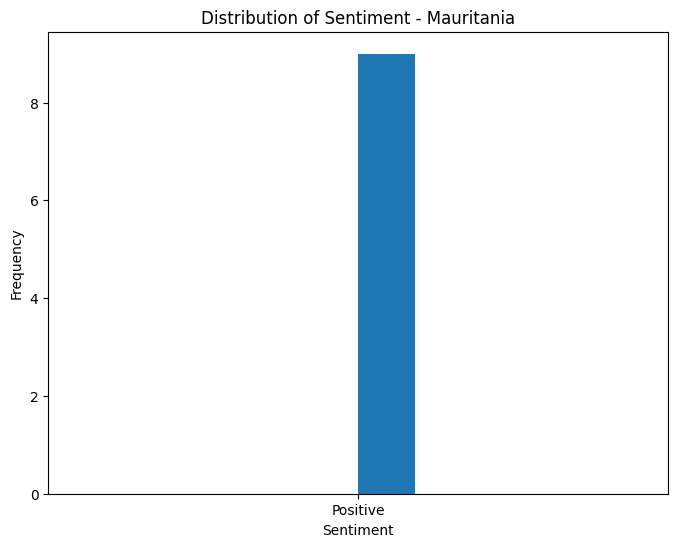

Positive    9
Name: Sentiment, dtype: int64



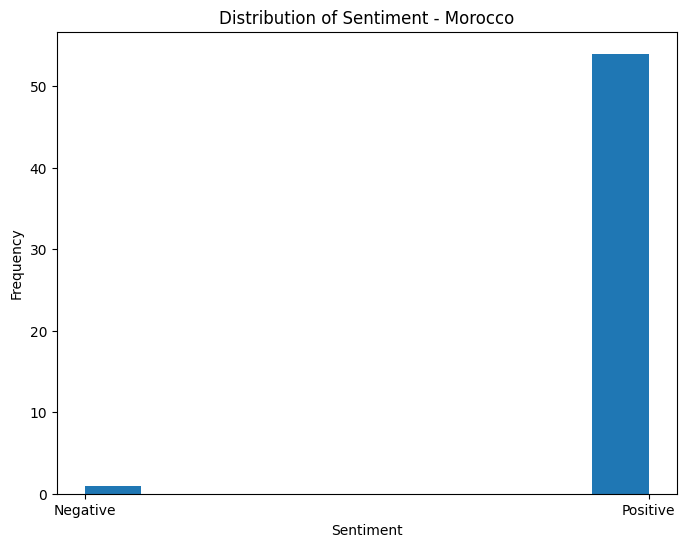

Positive    54
Negative     1
Name: Sentiment, dtype: int64



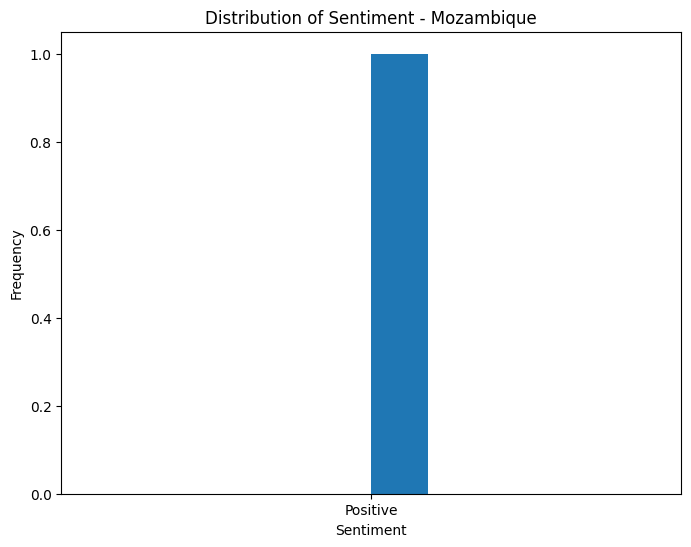

Positive    1
Name: Sentiment, dtype: int64



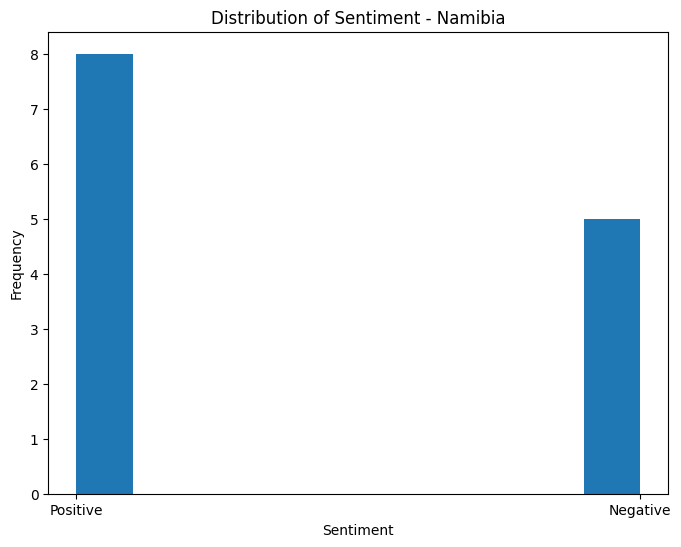

Positive    8
Negative    5
Name: Sentiment, dtype: int64



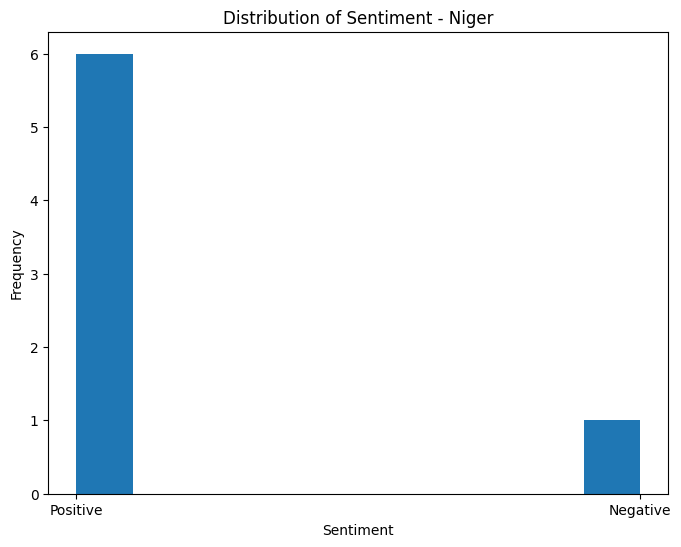

Positive    6
Negative    1
Name: Sentiment, dtype: int64



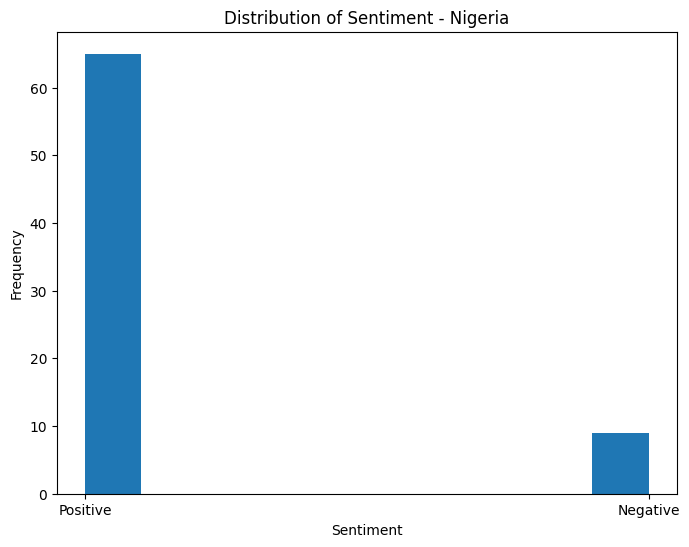

Positive    65
Negative     9
Name: Sentiment, dtype: int64



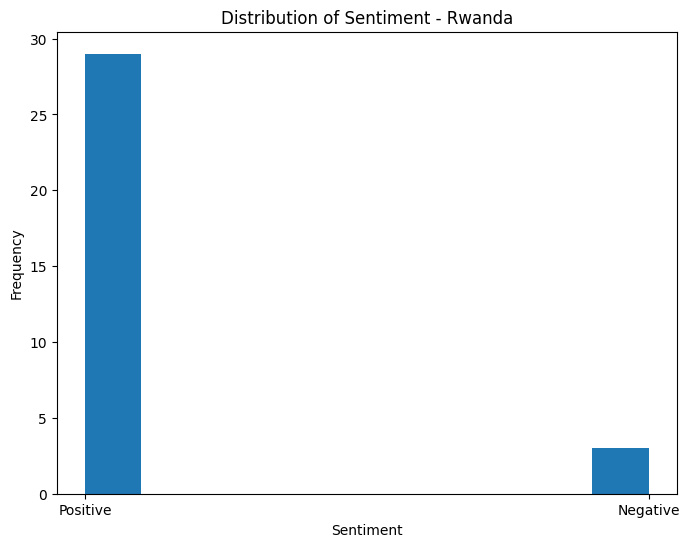

Positive    29
Negative     3
Name: Sentiment, dtype: int64



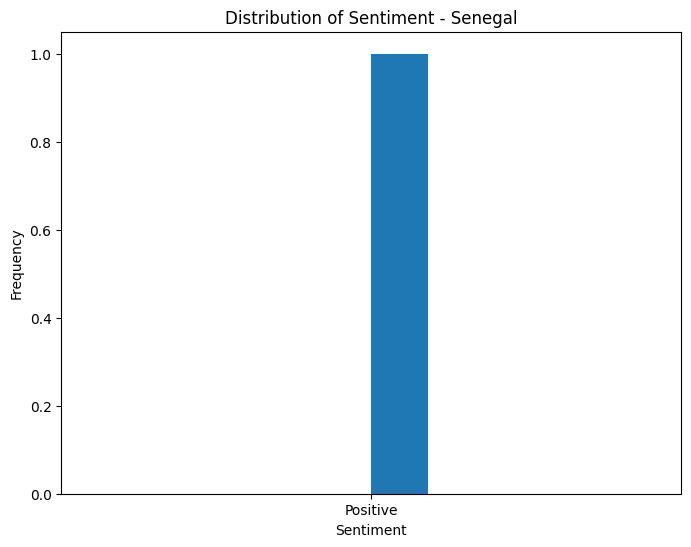

Positive    1
Name: Sentiment, dtype: int64



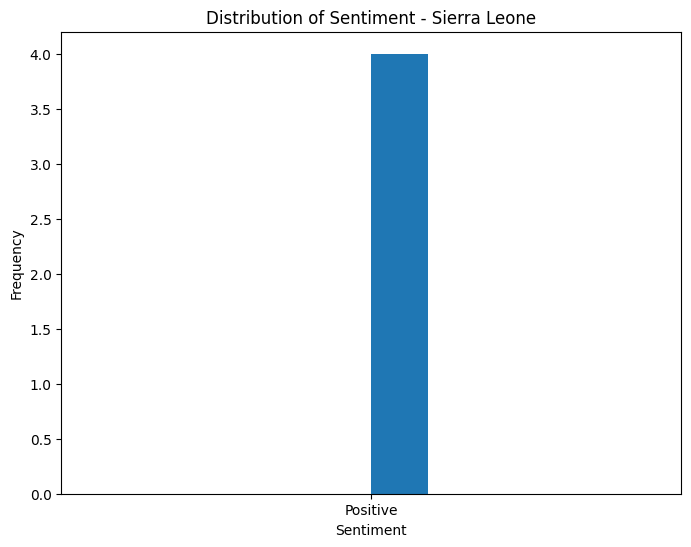

Positive    4
Name: Sentiment, dtype: int64



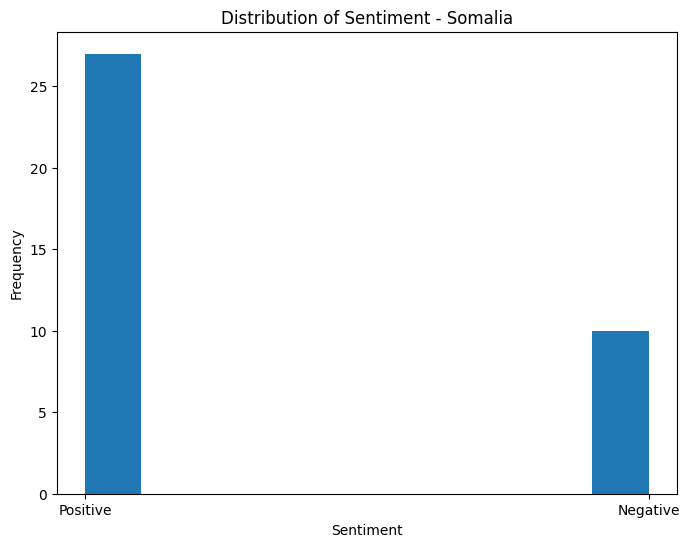

Positive    27
Negative    10
Name: Sentiment, dtype: int64



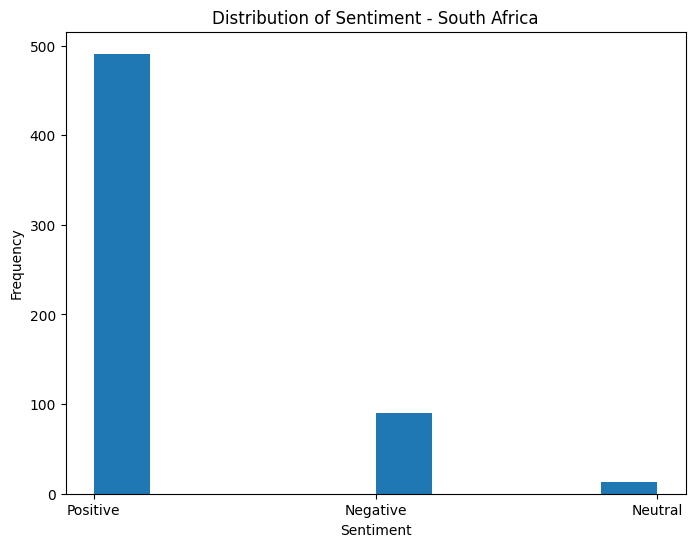

Positive    491
Negative     90
Neutral      13
Name: Sentiment, dtype: int64



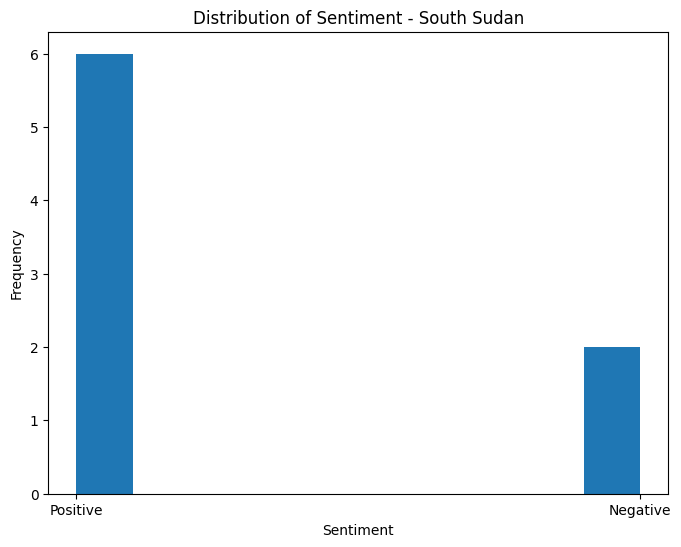

Positive    6
Negative    2
Name: Sentiment, dtype: int64



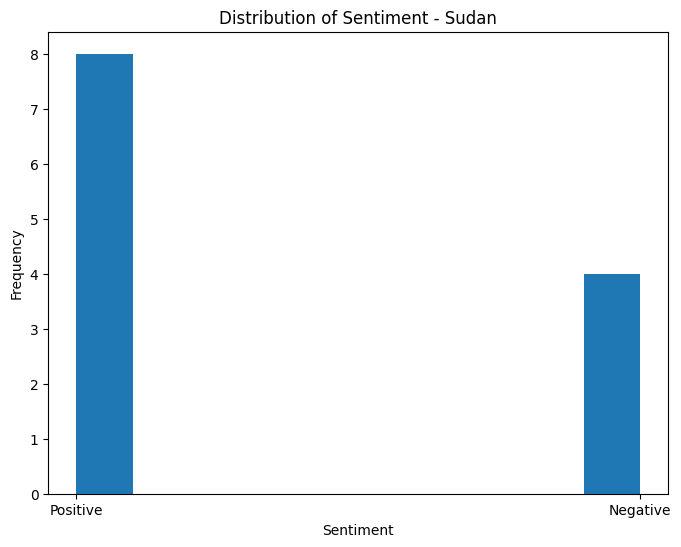

Positive    8
Negative    4
Name: Sentiment, dtype: int64



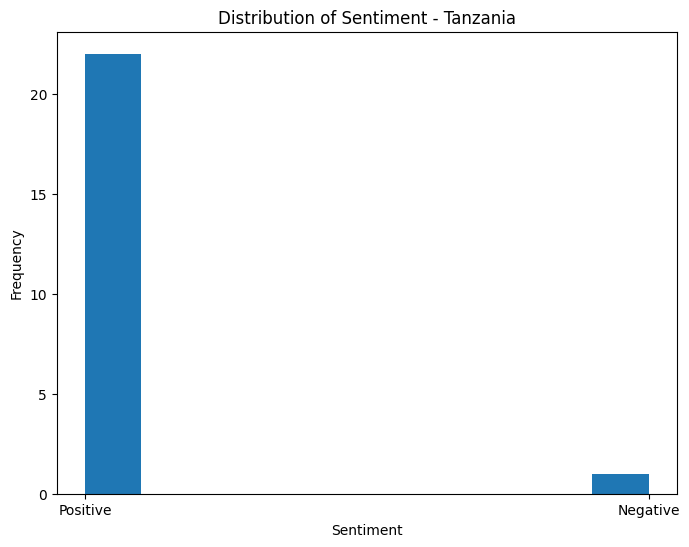

Positive    22
Negative     1
Name: Sentiment, dtype: int64



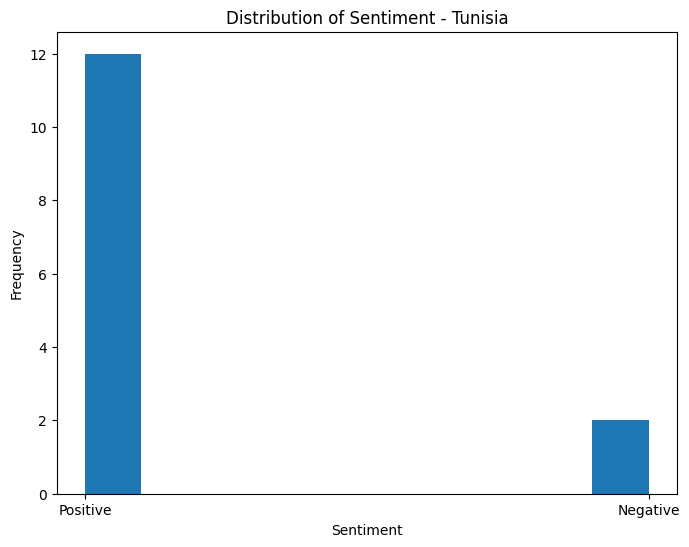

Positive    12
Negative     2
Name: Sentiment, dtype: int64



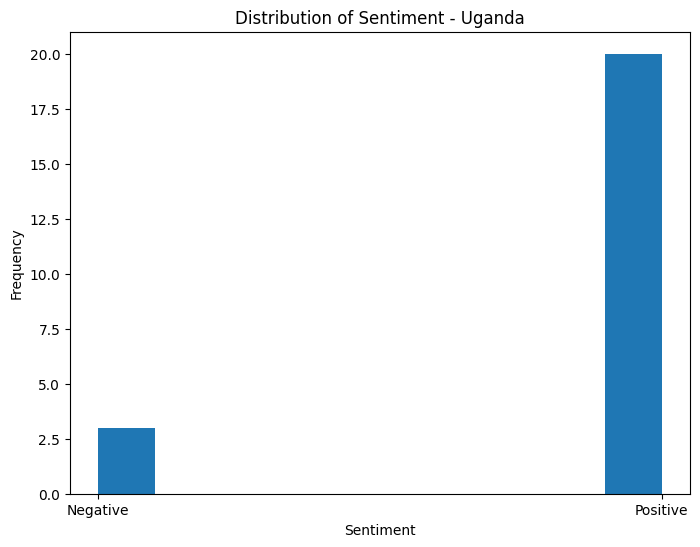

Positive    20
Negative     3
Name: Sentiment, dtype: int64



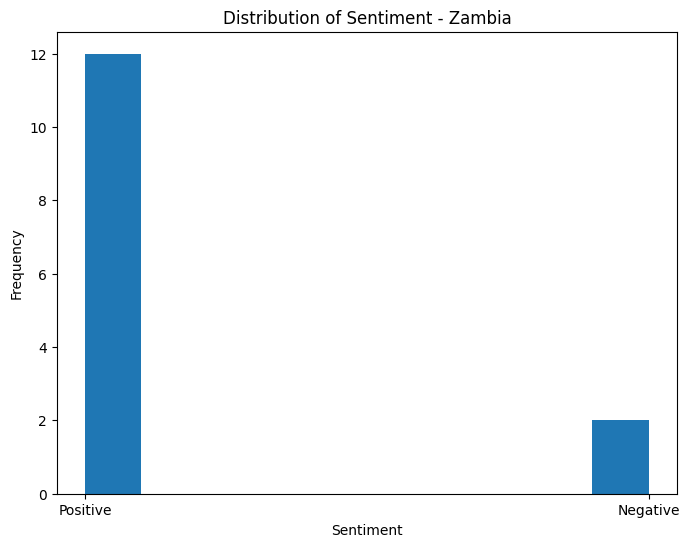

Positive    12
Negative     2
Name: Sentiment, dtype: int64



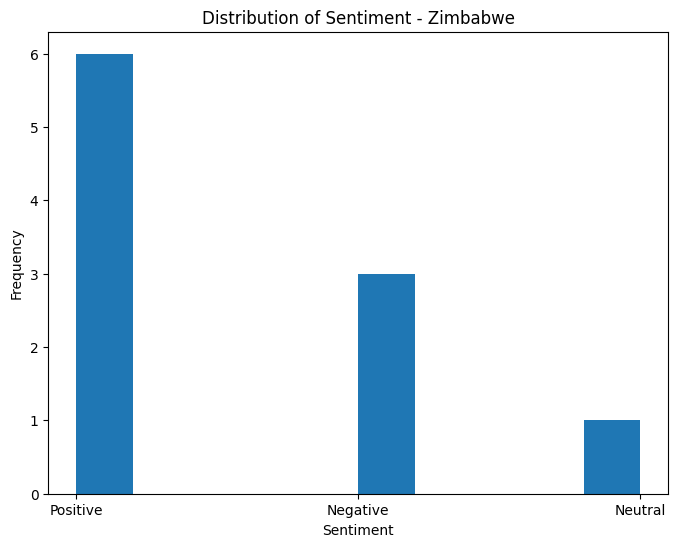

Positive    6
Negative    3
Neutral     1
Name: Sentiment, dtype: int64



In [ ]:
# Plot the distribution for each dataframe and add titles
for i, dataframe in enumerate(dataframes):
    entity_title = dataframe['Entity'].iloc[0].title()  # Get the first value of 'Entity' column
    plt.figure(figsize=(8, 6))
    plt.hist(dataframe['Sentiment'], bins=10)
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sentiment - {entity_title}')
    plt.show()
    print(dataframe['Sentiment'].value_counts())
    print()

In [ ]:
df['Sentiment'].value_counts()

Positive    5171
Negative    1031
Neutral       93
Name: Sentiment, dtype: int64